In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,cross_val_score
import time
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

clfs = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=1), 
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),random_state=1)

}

def run_classifieurs(X,Y,clfs):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        debut=time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
        fin=time.time()
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,
                                                                            np.mean(cv_acc),
                                                                            np.std(cv_acc),fin-debut))

## Data set SMS

In [3]:
datasms=pd.read_csv('./SMSSpamCollection.data',sep='\t',header=None)

In [4]:
datasms.head(3)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [5]:
Y=datasms.iloc[:,0].values
corpus=datasms.iloc[:,1].values
Y[Y=='spam']=1
Y[Y=='ham']=0
Y=Y.astype(int)

In [6]:
nbham=np.sum(Y==0)
nbspam=np.sum(Y==1)
print('Ham = {0:d} et Spam = {1:d}'.format(nbham,nbspam))

Ham = 4825 et Spam = 747


## CountVectorizer : création de la matrice de co-occurence

In [7]:
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
CV=CountVectorizer(max_features=300,stop_words='english')
CV.fit(corpus)
X=CV.transform(corpus)

In [12]:
## Le texte du premier sms
corpus[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
## Le vecteur correpodant donc au premier sms après transformation
X[0,:].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [14]:
CV.vocabulary_ # pour afficher le vocabulaire des mots (Bag of words) et les index
features=np.asarray(CV.get_feature_names()) # pour afficher que le vocabulaire des mots (Bag of words)
np.where(features=='great') # Recherche de l'index d'un mot

(array([102]),)

In [15]:
## Dans le cas de rajout de nouveaux stop_words et de re-run du Count Vectorizor
new_list=stop_words.ENGLISH_STOP_WORDS.union(frozenset({'000','10','100','1000','150p','150ppm','16','18'}))
CV=CountVectorizer(max_features=300,stop_words=new_list)
CV.fit(corpus)
X=CV.transform(corpus)
features=np.asarray(CV.get_feature_names())
print(features)

['1st' '2nd' '50' '500' 'account' 'actually' 'afternoon' 'ah' 'aight'
 'amp' 'apply' 'ask' 'asked' 'award' 'awarded' 'babe' 'baby' 'bad' 'bed'
 'best' 'better' 'big' 'birthday' 'bit' 'box' 'boy' 'bt' 'bus' 'buy'
 'called' 'calls' 'came' 'camera' 'car' 'care' 'cash' 'chance' 'chat'
 'check' 'claim' 'class' 'code' 'collect' 'com' 'come' 'coming' 'contact'
 'cool' 'cos' 'cost' 'cs' 'customer' 'da' 'dad' 'dat' 'day' 'days' 'dear'
 'den' 'details' 'did' 'didn' 'didnt' 'dinner' 'dis' 'does' 'doing' 'don'
 'dont' 'draw' 'dun' 'dunno' 'early' 'easy' 'eat' 'end' 'enjoy' 'evening'
 'face' 'feel' 'fine' 'finish' 'forgot' 'free' 'friend' 'friends' 'fuck'
 'fun' 'getting' 'girl' 'god' 'going' 'gonna' 'good' 'got' 'great' 'gt'
 'guaranteed' 'gud' 'guess' 'guys' 'haha' 'half' 'happy' 'having' 'hear'
 'heart' 'hello' 'help' 'hey' 'hi' 'holiday' 'home' 'hope' 'hour' 'house'
 'ill' 'im' 'important' 'job' 'join' 'jus' 'just' 'kiss' 'know' 'landline'
 'lar' 'late' 'later' 'latest' 'leave' 'left' 'leh' 'le

In [13]:
run_classifieurs(X.toarray(),Y,clfs)

Accuracy for RF is: 0.975 +/- 0.003 en 11.749s
Accuracy for ADA is: 0.975 +/- 0.005 en 7.954s
Accuracy for ET is: 0.973 +/- 0.005 en 16.002s
Accuracy for KNN is: 0.946 +/- 0.006 en 8.770s
Accuracy for MLP is: 0.975 +/- 0.005 en 67.922s
Accuracy for XGB is: 0.962 +/- 0.007 en 74.489s


### TF-IDF : normalisation des occurences des mots

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

In [22]:
TFIDF=TfidfTransformer()
TFIDF.fit(X)
X_TFIDF=TFIDF.transform(X)

#### Si vous souhaitez faire les deux étape en même temps
TFIDF=TfidfVectorizer(max_features=300,stop_words='english')
TFIDF.fit(corpus)
X_TFIDF=TDIDF.transform(corpus)

In [16]:
run_classifieurs(X_TFIDF.toarray(),Y,clfs)

Accuracy for RF is: 0.975 +/- 0.005 en 13.759s
Accuracy for ADA is: 0.976 +/- 0.004 en 8.088s
Accuracy for ET is: 0.977 +/- 0.003 en 17.170s
Accuracy for KNN is: 0.952 +/- 0.006 en 7.948s
Accuracy for MLP is: 0.977 +/- 0.007 en 27.957s
Accuracy for XGB is: 0.964 +/- 0.006 en 75.529s


## Sélection des mots clés les plus importants

['txt' 'free' 'claim' 'mobile' 'www' 'uk' 'prize' 'service' 'stop' 'text'
 'reply' 'win' '50' 'contact' 'cash' 'com' 'urgent' 'won' 'new' '500'
 'code' 'nokia' 'customer' 'chat' 'ringtone' 'cs' 'landline' 'sms' 'video'
 'cost' 'rate' 'tone' 'awarded' 'min' 'guaranteed' 'latest' 'shows' 'po'
 'message' 'box' 'camera' 'send' 'ur' 'mins' 'line' 'msg' 'draw' 'receive'
 'account' 'selected' 'help' 'apply' 'orange' 'just' 'award' 'collect'
 'holiday' 'hi' 'special' 'play' 'network' 'gt' 'lt' 'll' 'waiting'
 'phone' 'good' 'calls' 'know' 'like' 'week' 'tv' 'need' '1st' 'live'
 'time' 'number' 'make' 'xxx' 'xmas' 'got' 'chance' 'pls' 'offer' 'dont'
 'want' 'texts' 'day' 'sexy' 'real' 'hey' 'sent' 'did' 'love' 'buy'
 'looking' 'place' 'pick' 'days' 'let' 'little' 'think' 'luv' 'important'
 'wk' 'ok' 'don' 'end' 'hello' 'night' 'today' 'going' 'enjoy' 'wanna'
 'come' 've' 'talk' 'sorry' 'later' '2nd' 'thanks' 'tomorrow' 'year' 'sat'
 'great' 'babe' 'late' 'yes' 'ready' 'tell' 'mail' 'check' 'sir

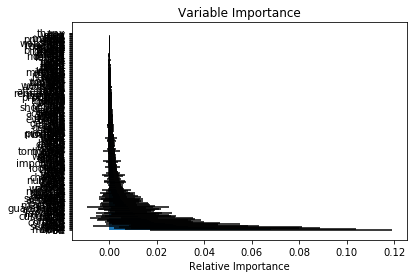

In [17]:
X_array=X_TFIDF.toarray()
clf = RandomForestClassifier(n_estimators=1000,random_state=1)
clf.fit(X_array, Y)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) 
sorted_idx = np.argsort(importances)[::-1]
features =np.asarray(CV.get_feature_names())
print(features[sorted_idx])
padding = np.arange(X_array.size/len(X_array)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center') 
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance") 
plt.show()

### Recherche du nombre de mots clés pertinents à garder (critère d'arrêt)

In [18]:
##conda install -c conda-forge kneed

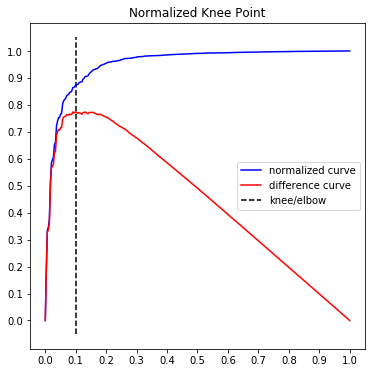

In [19]:
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
importances_S=MinMaxScaler().fit_transform(importances.reshape((-1,1))).flatten()
sorted_idx = np.argsort(importances_S)[::-1]
importances_trie = np.sort(importances_S)[::-1]
I = range(0, len(importances_S))
kneedle = KneeLocator(I, importances_trie, curve='convex', direction='decreasing')
nb_best=kneedle.elbow
kneedle.plot_knee_normalized()

### Affichage des mots clés pertinents

In [17]:
##nb_best est le nombre de mots clés gardés par l'étapes précédentes. Ce sont le smots clés qui
# ont fort pouvoir de discimination entre les deux classes Ham et Spam

['txt' 'free' 'claim' 'mobile' 'www' 'uk' 'prize' 'service' 'stop' 'text'
 'reply' 'win' '50' 'contact' 'cash' 'com' 'urgent' 'won' 'new' '500'
 'code' 'nokia' 'customer' 'chat' 'ringtone' 'cs' 'landline' 'sms' 'video'
 'cost']


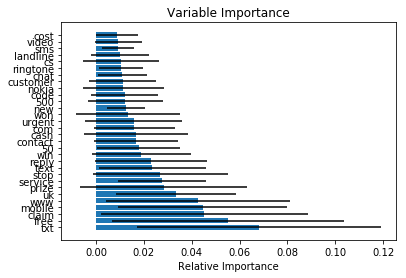

In [20]:
features =np.asarray(CV.get_feature_names())
print(features[sorted_idx][:nb_best])
padding = np.arange(nb_best) + 0.5
plt.barh(padding, importances[sorted_idx][:nb_best],xerr=std[sorted_idx][:nb_best], align='center') 
plt.yticks(padding, features[sorted_idx][:nb_best])
plt.xlabel("Relative Importance")
plt.title("Variable Importance") 
plt.show()

## SVD (Recherche de concepts)

In [23]:
from sklearn.decomposition import TruncatedSVD

In [24]:
SVD=TruncatedSVD(n_components=30)
SVD.fit(X_TFIDF)
X_SVD=SVD.transform(X_TFIDF)

In [23]:
run_classifieurs(X_SVD,Y,clfs)

Accuracy for RF is: 0.972 +/- 0.005 en 9.411s
Accuracy for ADA is: 0.963 +/- 0.006 en 12.103s
Accuracy for ET is: 0.972 +/- 0.006 en 2.841s
Accuracy for KNN is: 0.964 +/- 0.005 en 0.633s
Accuracy for MLP is: 0.970 +/- 0.006 en 15.742s
Accuracy for XGB is: 0.970 +/- 0.005 en 11.595s


In [25]:
### Une fonction pour affihcier les 10 premiers mots clés qui participent dans la construction de chaque concept

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Concept #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in np.abs(topic).argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [26]:
print_top_words(SVD, CV.get_feature_names(), 10)

Concept #0: ok gt lt just ll ur come like know got
Concept #1: ok gt lt lor ur like good wat min home
Concept #2: ok gt lt just ur free know ll good text
Concept #3: ll sorry later ur just free txt meeting day come
Concept #4: just ur like free know txt mobile ll sorry later
Concept #5: come just free good going ll time got home like
Concept #6: come like know just good home love don day time
Concept #7: like good know come day love free lor don ur
Concept #8: know good come want got don like ur dont free
Concept #9: got going come good da lor like ur day wat
Concept #10: ur free know good text stop just going reply new
Concept #11: got going da time home just lor did send free
Concept #12: da time going lor send got pls want sorry come
Concept #13: time want got going know come lor da good wat
Concept #14: lor want going time da home pls send day ok
Concept #15: da want time love good know going got day dont
Concept #16: want lor good pls time send love day home free
Concept #17: home

# Création d'un Pipeline

In [27]:
from sklearn.pipeline import Pipeline
import pickle

In [30]:
P = Pipeline([('bow',CountVectorizer(stop_words='english',max_features=300)),
                    ('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=50)), 
                    ('classifier',RandomForestClassifier(n_estimators=100,random_state=1))])

P.fit(corpus,Y)
pickle.dump(P,open('./pipeline_text.pkl','wb'))

### Utilisation de la pipeline

In [31]:
P=pickle.load(open('./pipeline_text.pkl','rb'))

In [37]:
#Un exemple de sms

text=["Please enter to www.news.com."]

if (P.predict(text)==0):
    print("Ce message est un Ham")
else:
    print("Ce message est un Spam")

Ce message est un Spam


## Données YELP

In [42]:
yelp = pd.read_csv('./yelp-text-by-stars.csv', sep=';',encoding="ISO-8859-1")
yelp.head(10)

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...
3,1,2Nd time eating here today.1st time was great ...
4,1,Allegiant is a disaster. Their fares are chea...
5,1,Saturday weekend after thanksgiving. Afternoon...
6,1,Very unimpressed by their pad Thai.. one of th...
7,1,I just called this North york Location at 416-...
8,1,So disappointed in the service that by the tim...
9,1,Service here is a complete clusterfuk. Very d...


In [43]:
Y=yelp.iloc[:,0].values
corpus=yelp.iloc[:,1].values
Y[Y<3]=0
Y[Y>=3]=1
Y=Y.astype(int)

In [44]:
nb_neg=np.sum(Y==0)
nb_pos=np.sum(Y==1)
print('Positive comments = {0:d} et Negative comments = {1:d}'.format(nb_pos,nb_neg))

Positive comments = 36948 et Negative comments = 10423


#### Création d'un pipeline de transformation sur les donénes YELP

In [45]:
P = Pipeline([('bow',CountVectorizer(stop_words='english',max_features=300)),
                    ('tfidf',TfidfTransformer()),
                    ('svd',TruncatedSVD(n_components=30))])

P.fit(corpus)

pickle.dump(P,open('./pipeline_tweet.pkl','wb'))

X=P.transform(corpus)

In [51]:
X.shape

(47371, 30)

#### Evaluation du modèle Random Forest par valdiation croisée 

In [46]:
clf=RandomForestClassifier(n_estimators=100,random_state=1)
kf = KFold(n_splits=3, shuffle=True, random_state=1) 
cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
print("Accuracy is: {0:.3f} +/- {1:.3f}".format(np.mean(cv_acc),np.std(cv_acc)))

Accuracy is: 0.844 +/- 0.004


#### Recherche des nouvelles meta-variables (polarity et subjectifity) grâce à l'API TextBlob 

In [49]:
from textblob import TextBlob
add_features=np.zeros((len(Y),2))
for i in np.arange(0, corpus.shape[0]):
    analysis = TextBlob(corpus[i])
    add_features[i,0]=analysis.polarity
    add_features[i,1]=analysis.subjectivity

#### Concaténation des nouvelles meta-variables avec les variables originales issues de la SVD et réévaluationdu modèle Random Forest

In [50]:
new_X=np.concatenate((X,add_features),axis=1)
new_X.shape

(47371, 32)

In [129]:
cv_acc = cross_val_score(clf, new_X, Y, cv=kf,scoring='accuracy')
print("Accuracy is: {0:.3f} +/- {1:.3f}".format(np.mean(cv_acc),np.std(cv_acc)))

Accuracy is: 0.883 +/- 0.002
